In [1]:
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

wine = load_wine()
wine_data = wine.data
wine_target = wine.target
df_wine = pd.DataFrame(data = wine_data, columns=wine.feature_names)

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [4]:
wine_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [5]:
df_target = pd.DataFrame(data = wine_target, columns=['label'])
data = pd.concat([df_wine, df_target], axis=1)

In [6]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'label'],
      dtype='object')

In [8]:
X = data.iloc[:,0:13].values
y = data.iloc[:,13].values

n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

from keras.utils import to_categorical

nb_classes = 3

y = to_categorical(y, nb_classes)

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) 

n_steps = X.shape[1]
n_steps

13

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.optimizers import SGD,Adam

def build_model(): 
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(3, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0048), metrics=['accuracy'])
    
    return model

model = build_model() 
print("input_shape => ", n_steps, n_features)
model.summary() 

input_shape =>  13 1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 12, 64)            192       
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 50)                38450     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 41,345
Trainable params: 41,345
Non-trainable params: 0
_________________________________________________________________


c:\Users\TFG155\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [10]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
5/5 [==============================] - 1s 76ms/step - loss: 14.5657 - accuracy: 0.3662 - val_loss: 11.3700 - val_accuracy: 0.3889
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 9.6463 - accuracy: 0.3169 - val_loss: 3.3740 - val_accuracy: 0.3889
Epoch 3/100
5/5 [==============================] - 0s 15ms/step - loss: 2.4999 - accuracy: 0.3099 - val_loss: 1.1071 - val_accuracy: 0.4722
Epoch 4/100
5/5 [==============================] - 0s 13ms/step - loss: 1.1009 - accuracy: 0.4648 - val_loss: 1.0256 - val_accuracy: 0.5556
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.8319 - accuracy: 0.6479 - val_loss: 0.8952 - val_accuracy: 0.6389
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.8435 - accuracy: 0.6408 - val_loss: 0.5985 - val_accuracy: 0.7500
Epoch 7/100
5/5 [==============================] - 0s 13ms/step - loss: 0.6947 - accuracy: 0.6831 - val_loss: 0.4988 - val_accuracy: 0.8056
Epoch 8/100
5/5 [=

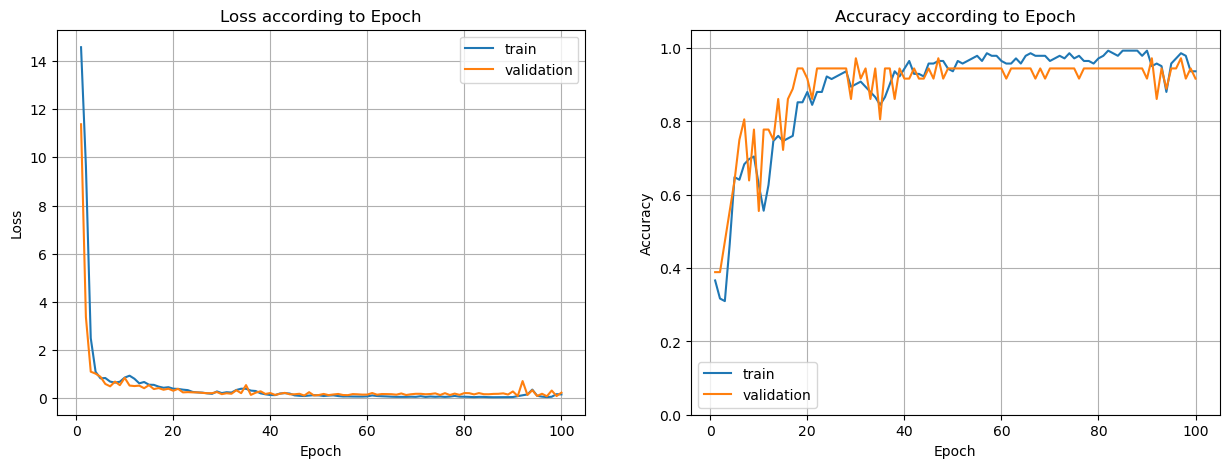

In [12]:
import pandas as pd

df_hist = pd.DataFrame(model_history.history)
df_hist['epoch'] = range(1, 101)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(df_hist['epoch'], df_hist['loss'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_loss'], label = 'validation')
# plt.ylim([0, 1.5])
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(df_hist['epoch'], df_hist['accuracy'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_accuracy'], label='validation')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.show()

In [13]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      0.88      0.90        16
           2       0.75      1.00      0.86         6

    accuracy                           0.92        36
   macro avg       0.89      0.93      0.91        36
weighted avg       0.93      0.92      0.92        36

[[13  1  0]
 [ 0 14  2]
 [ 0  0  6]]
